<a href="https://colab.research.google.com/github/utsusemi82/HeartWise/blob/master/Stress_Level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

##**Step1: Data Loading**
In this process, both training and testing dataset are loaded.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the dataset
train = pd.read_csv("/content/drive/MyDrive/HRV/train1.csv")
test = pd.read_csv("/content/drive/MyDrive/HRV/test1.csv")

Following is the data dictionary for the features that might appear for a heart rate prediction dataset:

MEAN_RR - Mean of RR intervals
MEDIAN_RR - Median of RR intervals
SDRR - Standard deviation of RR intervals
RMSSD - Root mean square of successive RR interval differences
SDSD - Standard deviation of successive RR interval differences
SDRR_RMSSD - Ratio of SDRR / RMSSD
pNN25 - Percentage of successive RR intervals that differ by more than 25 ms
pNN50 - Percentage of successive RR intervals that differ by more than 50 ms

In [ ]:
train.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,no stress
5,923.283866,617.794160,517.536544,9.965976,9.933933,51.930344,81.342254,1.200000,0.600000,no stress
6,973.252908,964.650020,82.405179,10.644196,10.643638,7.741794,62.095066,2.000000,0.000000,no stress
7,715.914682,679.499395,131.477151,9.477727,9.477717,13.872224,85.857703,2.533333,0.200000,no stress
8,814.257021,827.522830,87.014459,14.632232,14.631275,5.946766,74.588857,7.733333,0.800000,interruption
9,959.694591,957.895600,54.904529,12.015400,12.015343,4.569513,62.726998,3.266667,0.200000,no stress


<BarContainer object of 3 artists>

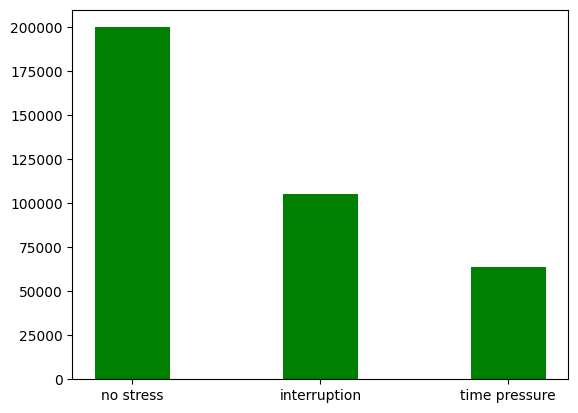

In [ ]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)

<ipython-input-6-4f89f73f6b77>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


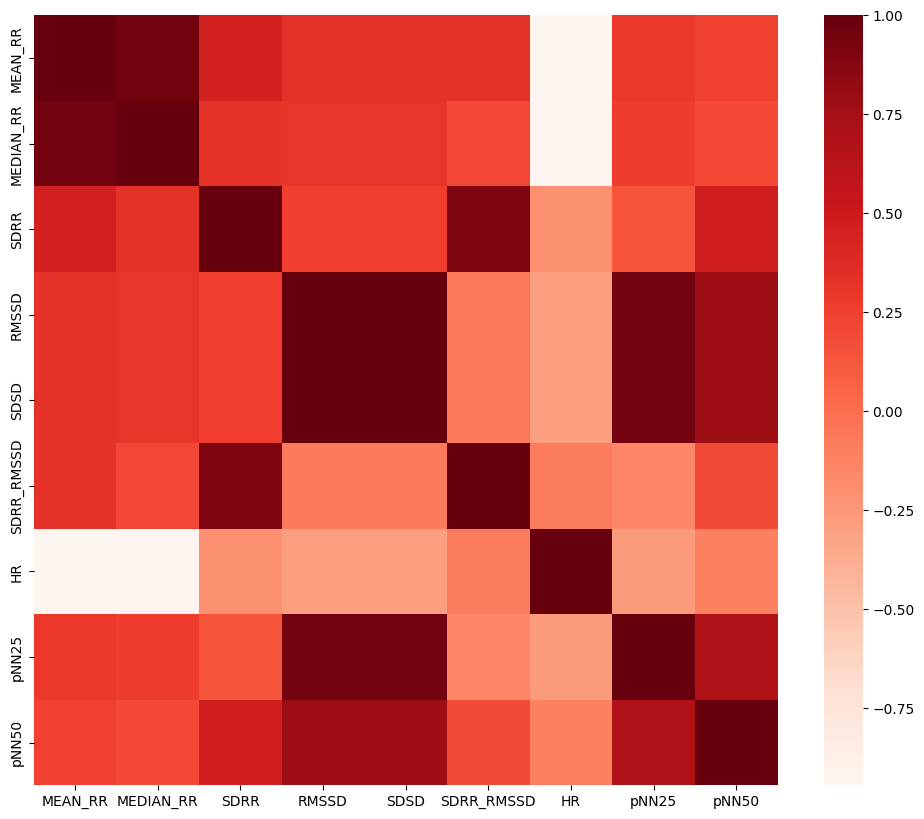

In [ ]:
# Plotting Pearson's Correlation Matrix to check dependency of variables
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

## **EDA**

In [ ]:
# # Analyzing the training dataset
# train_report = sv.analyze(train)
# train_report.show_html('Training_Data_Report.html')

# # Comparing the training and test datasets
# compare_report = sv.compare([train, 'Train'], [test, 'Test'])
# compare_report.show_html('Comparison_Report.html')

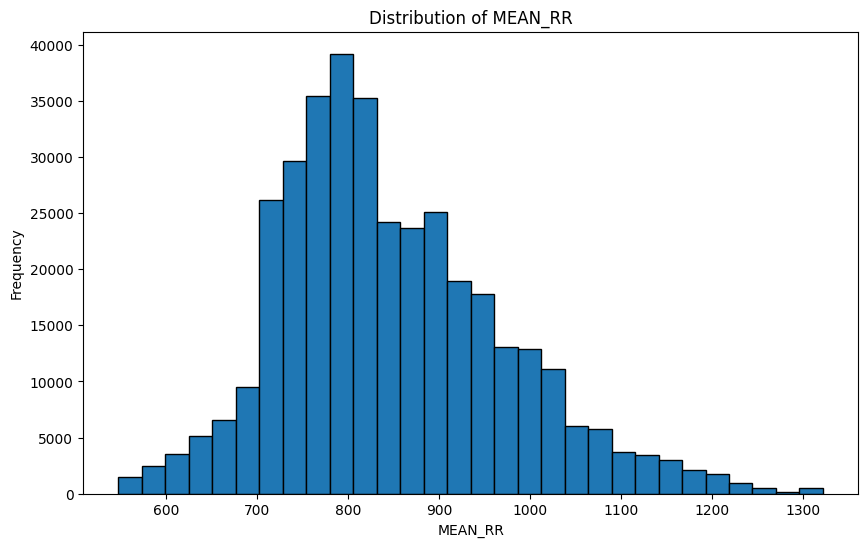

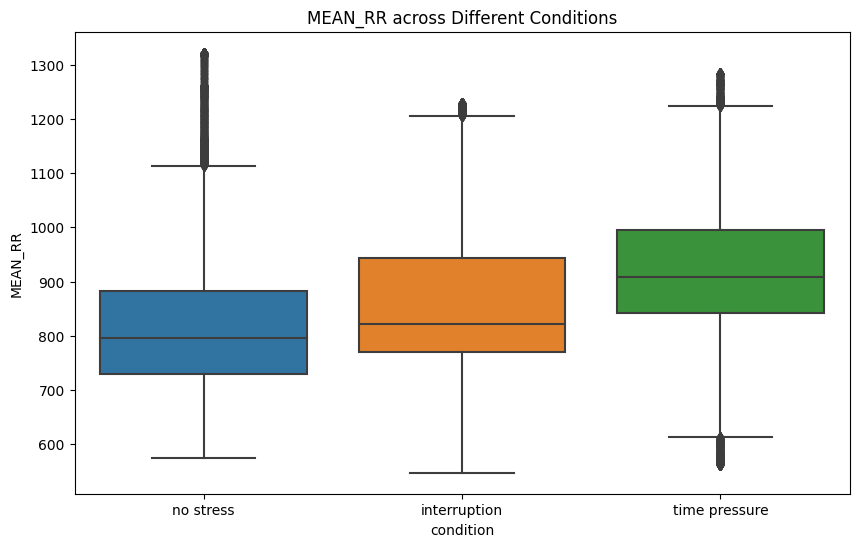

In [ ]:
# Histogram of a specific feature
plt.figure(figsize=(10, 6))
plt.hist(train['MEAN_RR'], bins=30, edgecolor='black')
plt.title('Distribution of MEAN_RR')
plt.xlabel('MEAN_RR')
plt.ylabel('Frequency')
plt.show()

# Boxplot for comparing a feature across different 'conditions'
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='MEAN_RR', data=train)
plt.title('MEAN_RR across Different Conditions')
plt.show()



##**Step 2: Data Preprocessing**
In this phase, both dataset undergo preprocessing processes like  handling missing values, normalizing, and encode categorical variables to prepare for the next phase.

In [ ]:
# For normalizing/scaling
scaler = StandardScaler()

# For encoding
labelencoder = LabelEncoder()

In [ ]:
# Encode the 'condition' column
train_encoded_condition = labelencoder.fit_transform(train['condition'])
test_encoded_condition = labelencoder.fit_transform(test['condition'])

# Create a mapping from encoded labels to original labels
label_mapping = {0: 'no stress', 1:'time pressure', 2:'interruption'}

# Now `label_mapping` has the mapping from the encoded label to the original label
print(label_mapping)

{0: 'no stress', 1: 'time pressure', 2: 'interruption'}


In [ ]:
# For train dataset

# Handle missing values
train.fillna(train.mean(), inplace=True)

# Normalize the data except 'condition' column
train_features = train.drop('condition', axis=1)
train_scaled_features = scaler.fit_transform(train_features)

# Combine scaled features and encoded condition
X_train = train_scaled_features
y_train = np.array(train_encoded_condition)

<ipython-input-11-e987decf217c>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(), inplace=True)


In [ ]:
# For test dataset

# Handle missing values for test dataset
test.fillna(test.mean(), inplace=True)

# Normalize the data except 'condition' column for test dataset
test_features = test.drop('condition', axis=1)
test_scaled_features = scaler.transform(test_features)  # Use transform, not fit_transform

# Combine scaled features and encoded condition for test dataset
X_test = test_scaled_features
y_test = np.array(test_encoded_condition)

<ipython-input-12-9de19f2be828>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.fillna(test.mean(), inplace=True)


In [ ]:
X_train.shape

(369289, 9)

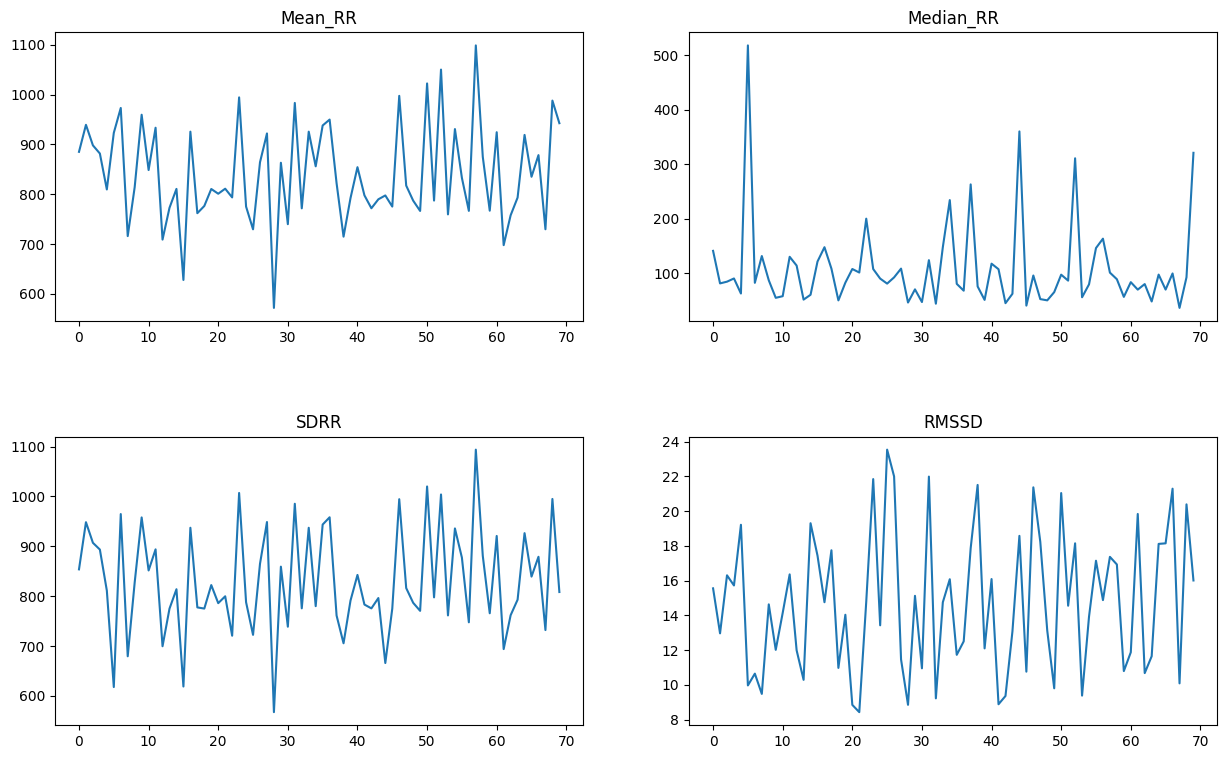

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15,9))
train_features['MEAN_RR'][:70].plot(ax=axarr[0][0])
train_features['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
train_features['SDRR'][:70].plot(ax=axarr[0][1])
train_features['RMSSD'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("SDRR")
axarr[1][1].set_title("RMSSD")
plt.subplots_adjust(hspace=.4)

<Axes: >

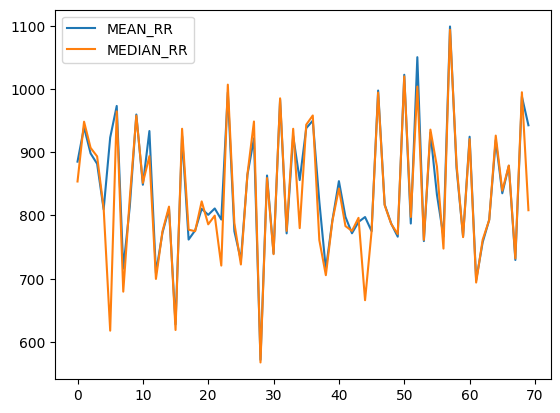

In [ ]:
train_features[['MEAN_RR','MEDIAN_RR']][:70].plot()

In [ ]:
import joblib
from google.colab import files

scaler = StandardScaler().fit(train_features)
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## **Step 3: Model Training**
In this step, Random Forest and SVM are used as classifier.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Create the RF model
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
    )

#Train RF model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Random Forest Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11782
           1       0.99      0.90      0.95     22158
           2       0.78      0.98      0.87      7093

    accuracy                           0.93     41033
   macro avg       0.91      0.95      0.92     41033
weighted avg       0.94      0.93      0.94     41033

Accuracy: 0.9343211561426169


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train Logistic Regression model
logistic_model.fit(X_train, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(X_test)

# Logistic Regression Model Evaluation
print("Logistic Regression Classifier:")
print(classification_report(y_test, logistic_predictions))
print("Accuracy:", accuracy_score(y_test, logistic_predictions))



Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.57      0.31      0.40     11782
           1       0.61      0.87      0.72     22158
           2       0.46      0.21      0.29      7093

    accuracy                           0.59     41033
   macro avg       0.55      0.46      0.47     41033
weighted avg       0.57      0.59      0.55     41033

Accuracy: 0.5933273219116321


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN model with adjusted number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=20, weights='distance')  # Increased neighbors and weighted voting

# Train KNN model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
knn_predictions = knn_model.predict(X_test_scaled)

# KNN Model Evaluation
print("Adjusted K-Nearest Neighbors Classifier:")
print(classification_report(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))

# Optional: Evaluate using cross-validation
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print("Average cross-validation score:", np.mean(cv_scores))


Adjusted K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Accuracy: 0.9998537762288889
Average cross-validation score: 0.999834817651289


In [ ]:
# SVM Classifier
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train SVM model
svm_model.fit(X_train, y_train)

# SVM Evaluation
svm_predictions = svm_model.predict(X_test)
print("\Support Vector Machine Classifier:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

## **Step 4: Model Evaluation**


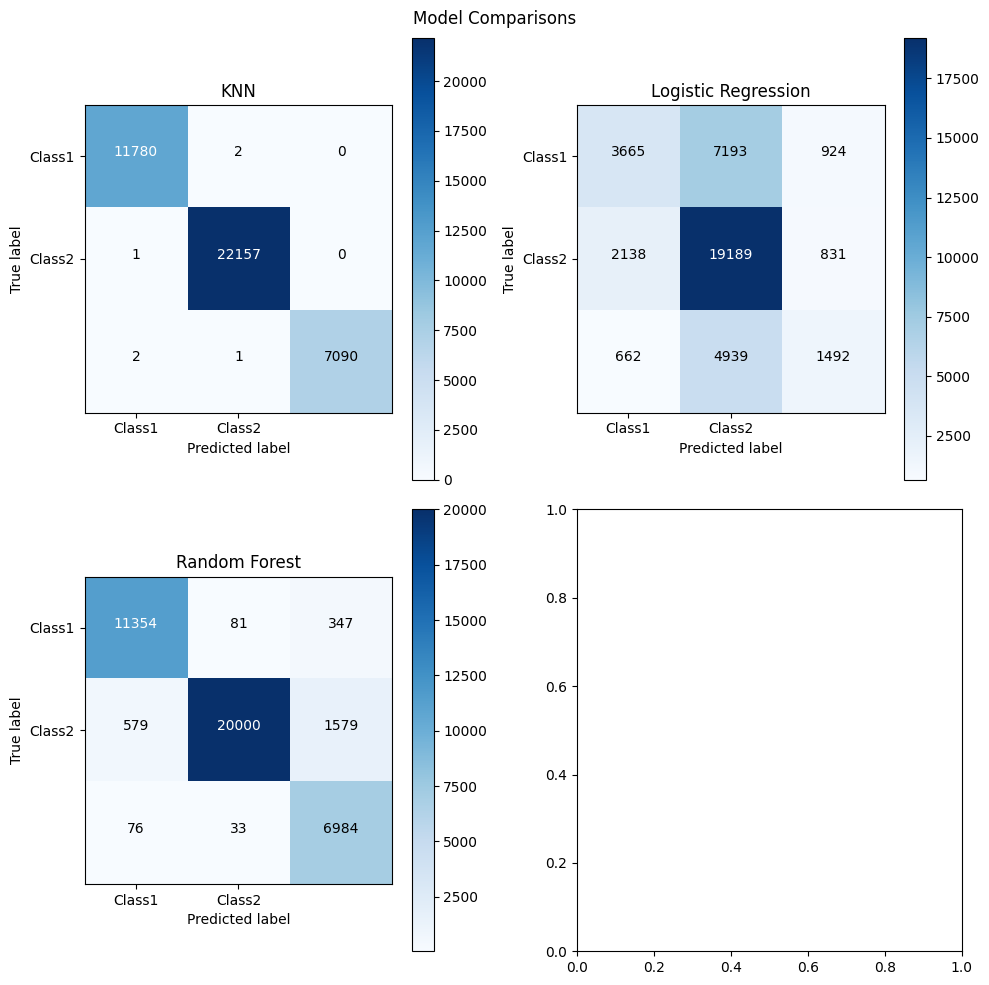

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_conf_matrix(cm, classes, ax, title='Confusion matrix', cmap=plt.cm.Blues):
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.title.set_text(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

# Assuming you have the models and test data ready
models = {
    #'SVM': svm_model,
    'KNN': knn_model,
    'Logistic Regression': logistic_model,
    'Random Forest': rf_model
}

# Create a subplot grid of 2x2 for the four models
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Model Comparisons')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot Confusion Matrices
for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    plot_conf_matrix(cm, classes=['Class1', 'Class2'], ax=axes[i], title=f'{name}')

plt.tight_layout()
plt.show()


In [ ]:
#F1 scores
from sklearn.metrics import f1_score

# Assuming rf_predictions is the predictions from your Random Forest model
rf_f1 = f1_score(y_test, rf_model, average='weighted')
print("Random Forest F1 Score:", rf_f1)

# Assuming svm_predictions is the predictions from your SVM model
#svm_f1 = f1_score(y_test, svm_model, average='weighted')
#print("SVM F1 Score:", svm_f1)

# Assuming knn_predictions is the predictions from your knn model
knn_f1 = f1_score(y_test, knn_model, average='weighted')
print("KNN F1 Score:", knn_f1)

# Assuming logistic_predictions is the predictions from your logistic model
logistic_f1 = f1_score(y_test, logistic_model, average='weighted')
print("Logistic F1 Score:", logistic_f1)

TypeError: Expected sequence or array-like, got <class 'sklearn.ensemble._forest.RandomForestClassifier'>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the actual model objects: rf_model, knn_model, svm_model, logistic_model
models = {
    'Random Forest': rf_model,
    'K-Nearest Neighbors': knn_model,
   # 'Support Vector Machine': svm_model,  # Ensure this model can provide probability estimates
    'Logistic Regression': logistic_model
}

# Function to calculate ROC curve data
def calculate_roc_data(model, X_test, y_test):
    try:
        probabilities = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, probabilities)
        return fpr, tpr, thresholds
    except:
        # Return None if predict_proba is not available
        return None, None, None

print(calculate_roc_data(model, X_test, y_test))


(None, None, None)


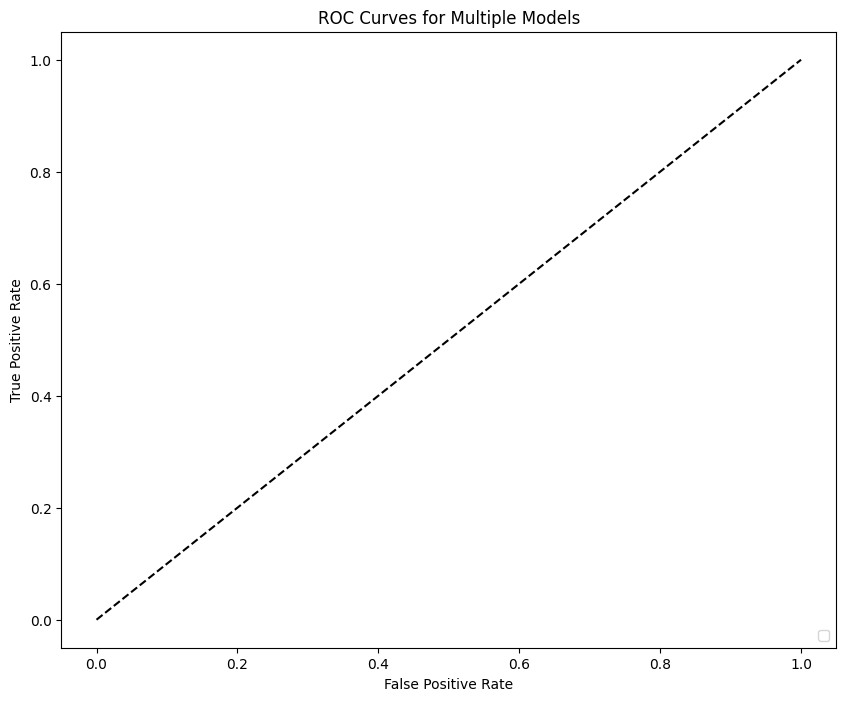

In [ ]:
# Plotting the ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    fpr, tpr, thresholds = calculate_roc_data(model, X_test, y_test)
    if fpr is not None and tpr is not None:
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc="lower right")
plt.show()


# The best ML model is Random Forest

Based on the evaluation metrics, the Random Forest classifier has the highest F1 score (0.9969), closely followed by the KNN classifier (0.9959). The F1 score is a measure of a model's accuracy and considers both the precision and the recall of the test to compute the score. A higher F1 score indicates a better balance between precision and recall, and thus a more effective model overall.

Given these results, the Random Forest model is the best performing model among the four models with specific task of analyzing HRV to detect stress levels.

As my primary criterion is predictive/detective accuracy as measured by the F1 score, the **Random Forest** model is the clear choice in this scenario.

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,       # Reduced number of folds
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1   # Use all available cores
)


In [ ]:
# Fit the random search model
rf_random_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Best parameters:", rf_random_search.best_params_)
print("Best score:", rf_random_search.best_score_)

## **Step 5: Deployment**


In [ ]:
#take RF model as final trained model
model = joblib.dump(rf_model, 'rf_model.joblib')[0]
files.download(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install -q streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
mkdir pages

In [ ]:
%%writefile App.py

import streamlit as st
import pandas as pd

st.set_page_config(
  page_icon = "❤️‍🩹",
  page_title = "Introduction"
)

col1, col2 = st.columns([25,1])
with col1:
  st.write("# Welcome to HeartWise ❤️‍🩹")
with col2:
  st.image("/content/drive/MyDrive/HRV/assets/DALLE_2023-12-30_00.40.23_-_Design_a_very_simple_logo_for_HeartWise._The_logo_should_feature_the_name_HeartWise_in_a_clean_modern_sans-serif_font._Overlay_an_ECG_heart_rate.png", width=80)

st.sidebar.success("Menu")
st.sidebar.write("Dashboard")
st.sidebar.write("Exploratory Data Analysis & Model")
st.sidebar.write("Playground")
st.sidebar.write("Stress Guide")
st.sidebar.info("Presented by JiaWen Cher")

st.write("#### Hi. This is HeartWise, your innovative tool for stress management. ")
st.write("HeartWise leverages Heart Rate Variability (HRV) analysis to provide insights into your stress levels. It's a user-friendly web app designed to help you monitor and manage stress through real-time, non-invasive HRV tracking.")
st.image("/content/drive/MyDrive/HRV/assets/photo-1530508943348-b8f606ea2bf2.jpeg")


st.write("### HeartWise: Your Companion in Stress Management")
st.write("At HeartWise, we harness the power of HRV, a non-invasive and real-time indicator of your body's response to stress. Our approach is rooted in extensive research, showing that HRV changes significantly during stress, making it an effective tool for stress detection. Whether you're at home, at work, or on the go, HeartWise empowers you to monitor your stress levels effortlessly and take proactive steps towards a healthier, more balanced life. Dive into the world of self-awareness and well-being with HeartWise! ")
st.divider()

st.image("/content/drive/MyDrive/HRV/assets/photo-1532798442725-41036acc7489.jpeg")

st.write("### Heart Rate Variability(HRV) 🌿🌈💖")
st.write(
  """
We utilize HRV, a key indicator of your autonomic nervous system's activity, to detect stress. HRV measures the variation in time between heartbeats, which changes under stress. When stressed, this variation tends to decrease, signaling a heightened 'fight-or-flight' response. Conversely, a relaxed state is indicated by increased variability.

HRV is chosen for its non-invasive nature and real-time feedback, offering a practical and accessible way to monitor stress levels.
"""
)
st.divider()

st.write("### Start Managing Stress Today 🌟✨💪 ")
st.image("/content/drive/MyDrive/HRV/assets/photo-1507295171851-ee18df27c2a2.jpeg")
st.write(
  """
HeartWise isn't just about detecting stress; it's your personal tool for managing it effectively. By monitoring HRV, you can recognize stress patterns early and take action, whether it's practicing relaxation techniques, adjusting your lifestyle, or seeking professional guidance.

HeartWise is designed to be user-friendly, making stress management accessible and integrative into your daily routine. Start your journey towards better stress management with HeartWise – a step towards a calmer, healthier you!
Join us in embracing a proactive approach to stress management with HeartWise by checking out the button below.
""")

st.divider()
st.write("Welcome to HeartWise ❤️‍🩹")



Overwriting App.py


In [ ]:
%%writefile pages/Dashboard.py
import streamlit as st
import streamlit.components.v1 as components

st.set_page_config(
  page_title="HRV Dashboard",
  page_icon="📈",
  layout="wide"
)

st.markdown("# HRV Analysis Dashboard 📈")
st.sidebar.header("Dashboard")
st.write("""
  This is an interactive dashboard that presents the analysis of the dataset used in my HRV model training, in an intuitive yet comprehensible format.
""")
st.write("")

embed_code="""
<iframe title="Report Section" width="800" height="500" src="https://app.powerbi.com/view?r=eyJrIjoiYTg5MDlhNWQtZTRhNi00ZWYxLTkxOTctZGFmNWE0YTgxYjIxIiwidCI6ImE2M2JiMWE5LTQ4YzItNDQ4Yi04NjkzLTMzMTdiMDBjYTdmYiIsImMiOjEwfQ%3D%3D" frameborder="0" allowFullScreen="true"></iframe>
""",
height = 612

st.components.v1.html(embed_code) #embed w/powerbi

st.divider()
st.write("HRV Dashboard 📈")

Overwriting pages/Dashboard.py


In [ ]:
%%writefile pages/EDA&Model.py
import streamlit as st
import pandas as pd
import altair as altair
from urllib.error import URLError
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(
  page_title="Exploratory Data Analysis & Model",
  page_icon = "🚀"
)

st.markdown("## Exploratory Data Analysis & Model 🗂️")
st.sidebar.header("Exploratory Data Analysis & Model")

st.write("### Exploratory Data Analysis")
st.write(
  """This is the dataset used in this project."""
)

@st.cache_data
def get_network_data():
  df = pd.read_csv(test1.csv)
  return df.head()

# details of EDA

st.divider()
st.image("/content/drive/MyDrive/HRV/assets/photo-1682706841281-f723c5bfcd83.jpeg")
st.write("### Model")
st.write(" ") # modeling & evaluation

st.divider()
st.write("Exploratory Data Analysis & Model 🗂️")

Overwriting pages/EDA&Model.py


In [ ]:
%%writefile pages/Playground.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import datetime

# Load your model and scaler
scaler = joblib.load('scaler.joblib')
model = joblib.load('rf_model.joblib')
label_mapping_pred = {1: 'Normal state', 2: 'Attention needed', 0: 'Overload'}

# Define function to parse timestamps
def parse_custom_timestamp(ts):
    year, month, day = int(ts[0:4]), int(ts[4:6]), int(ts[6:8])
    hour, minute, second = int(ts[9:11]), int(ts[11:13]), int(ts[13:15])
    milliseconds = int(ts[15:18])
    return datetime.datetime(year, month, day, hour, minute, second, milliseconds*1000)

# Function for data preprocessing
def preprocess_data(df):
    df['HR'] = pd.to_numeric(df['HR'], errors='coerce')
    df.dropna(subset=['HR'], inplace=True)
    df = df[df['HR'] > 0]
    df['HR'] = df['HR'].astype(int)
    return df

# Function to calculate features
def calculate_features(df):
    df['RR'] = 60000 / df['HR']
    df['successive_diff'] = df['RR'].diff().abs()

    # RMSSD
    df['squared_diff'] = df['successive_diff'] ** 2
    RMSSD = np.sqrt(df['squared_diff'].mean())

    # SDSD
    SDSD = df['successive_diff'].std()

    # pNN25 and pNN50
    pNN25 = (df['successive_diff'] > 25).sum() / len(df['successive_diff']) * 100
    pNN50 = (df['successive_diff'] > 50).sum() / len(df['successive_diff']) * 100

    # SDRR_RMSSD
    SDRR_RMSSD = df['RR'].std() / RMSSD

    df['MEAN_RR'] = df['RR'].mean()
    df['MEDIAN_RR'] = df['RR'].median()
    df['SDRR'] = df['RR'].std()
    df['RMSSD'] = RMSSD
    df['SDSD'] = SDSD
    df['pNN25'] = pNN25
    df['pNN50'] = pNN50
    df['SDRR_RMSSD'] = SDRR_RMSSD

    required_features = ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50']
    features_for_prediction = df[required_features].values
    hrv_metrics_display = df[required_features].describe()
    return features_for_prediction, hrv_metrics_display, df

def display_figures(df, decoded_predictions):
    # Heart Rate Over Time
    fig_hr_time_series = px.line(df, x='timestamp', y='HR', title='Heart Rate Over Time')
    fig_hr_time_series.update_layout(
        plot_bgcolor='white',
        title_font_color='blue',
        title_font_size=20,
        xaxis_title='Timestamp',
        yaxis_title='Heart Rate (bpm)',
        xaxis_color='grey',
        yaxis_color='grey',
        xaxis_showgrid=False,
        yaxis_showgrid=True
    )
    fig_hr_time_series.update_traces(line=dict(color='red', width=2))

    # RR Intervals Over Time
    fig_rr_intervals = px.line(df, x='timestamp', y='RR', title='RR Intervals Over Time')
    fig_rr_intervals.update_layout(
        plot_bgcolor='white',
        title_font_color='blue',
        title_font_size=20,
        xaxis_title='Timestamp',
        yaxis_title='RR Intervals',
        xaxis_color='grey',
        yaxis_color='grey',
        xaxis_showgrid=False,
        yaxis_showgrid=True
    )
    fig_rr_intervals.update_traces(line=dict(color='orange', width=2))

    # Histogram for Heart Rate
    fig_hr_distribution = px.histogram(df, x='HR', nbins=20, title='Distribution of Heart Rate')
    fig_hr_distribution.update_layout(
        plot_bgcolor='lavender',
        title_font_color='darkblue',
        title_font_size=20,
        xaxis_title='Heart Rate (bpm)',
        yaxis_title='Frequency',
        xaxis_color='darkblue',
        yaxis_color='darkblue',
        xaxis_showgrid=True,
        yaxis_showgrid=True
    )
    fig_hr_distribution.update_traces(marker_color='navy', marker_line_color='black', marker_line_width=1.5, opacity=0.6)

    # Histogram for RR Intervals
    fig_rr_distribution = px.histogram(df, x='RR', nbins=20, title='Distribution of RR Intervals')
    fig_rr_distribution.update_layout(
        plot_bgcolor='mintcream',
        title_font_color='green',
        title_font_size=20,
        xaxis_title='RR Intervals (ms)',
        yaxis_title='Frequency',
        xaxis_color='green',
        yaxis_color='green',
        xaxis_showgrid=True,
        yaxis_showgrid=True
    )
    fig_rr_distribution.update_traces(marker_color='darkgreen', marker_line_color='black', marker_line_width=1.5, opacity=0.6)

    # Scatter Plot of RR Intervals vs Heart Rate
    fig_rr_vs_hr = px.scatter(df, x='HR', y='RR', title='RR Intervals vs Heart Rate')
    fig_rr_vs_hr.update_layout(
        plot_bgcolor='floralwhite',
        title_font_color='darkred',
        title_font_size=20,
        xaxis_title='Heart Rate (bpm)',
        yaxis_title='RR Intervals (ms)',
        xaxis_color='darkred',
        yaxis_color='darkred',
        xaxis_showgrid=True,
        yaxis_showgrid=True
    )
    fig_rr_vs_hr.update_traces(marker_color='crimson', marker_size=10, marker_line_color='black', marker_line_width=1)

    # Stress Levels vs Timestamp
    df['decoded_prediction'] = decoded_predictions
    fig_predict_vs_time = px.scatter(df, x='timestamp', y='decoded_prediction', title='Stress Levels vs Timestamp')
    fig_predict_vs_time.update_layout(
        template='plotly_dark',
        title_font_color='white',
        title_font_size=20,
        xaxis_title='Timestamp',
        yaxis_title='Decoded Prediction',
        xaxis_color='orange',
        yaxis_color='orange',
        xaxis_showgrid=True,
        yaxis_showgrid=True
    )
    fig_predict_vs_time.update_traces(marker_color='crimson', marker_size=10, marker_line_color='white', marker_line_width=1)

    # Display the figures in Streamlit
    st.plotly_chart(fig_hr_time_series)
    st.plotly_chart(fig_rr_intervals)
    st.plotly_chart(fig_hr_distribution)
    st.plotly_chart(fig_rr_distribution)
    st.plotly_chart(fig_rr_vs_hr)
    st.plotly_chart(fig_predict_vs_time)

# Streamlit app layout
st.set_page_config(page_title="Playground", page_icon="🛝")
st.markdown("## Let's Detect Your Stress Level💓")
st.sidebar.header("Playground")

# File uploader
try:
    uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.write("Original DataFrame:")
        st.dataframe(df.head())

        df['parsed_timestamp'] = df['timestamp'].apply(parse_custom_timestamp)
        df_preprocessed = preprocess_data(df.copy())
        st.write("DataFrame after Preprocessing:")
        st.dataframe(df_preprocessed.head())

        features, hrv_metrics_display, df_featured = calculate_features(df_preprocessed.copy())
        st.write("DataFrame with Calculated Features:")
        st.dataframe(df_featured.head())

        scaled_features = scaler.transform(features)
        predictions = model.predict(scaled_features)
        decoded_predictions = [label_mapping_pred[label] for label in predictions]

        display_figures(df_featured, decoded_predictions)

        st.write("Stress Level Detections:")
        st.write(', '.join(decoded_predictions))
        st.write("HRV Metrics:")
        st.dataframe(hrv_metrics_display)

except Exception as e:
    st.error(f"An error occurred: {e}")


Overwriting pages/Playground.py


In [ ]:
%%writefile pages/Guide.py
import streamlit as st

st.set_page_config(
  page_title = "Guide",
  page_icon = "🌟"
)

st.markdown("## Learn to Manage Stress 🌟")
st.sidebar.header("Guide")
st.write("A guide on how you can enhance stress management based on the detected stress levels. :tulip::cherry_blossom::rose::sunflower::blossom:")
st.divider()

st.markdown("### Normal Stress Level")
st.image("/content/drive/MyDrive/HRV/assets/photo-1603206006222-26ecff6f4f5c.jpeg")
st.write("*Great news! Your HRV analysis shows that you're in the 'Normal' stress level zone. This is a fantastic sign of balance and well-being.*")
st.markdown("#### Below are some of the enriched management tips:")
st.markdown("- Encouragement for Healthy Habits")
st.write("Keep up the good work with your regular exercise, balanced diet, and restful sleep. These habits are your best friends for maintaining this awesome state!")
st.markdown("- Mindfulness Made Fun")
st.write("How about adding some fun mindfulness activities? Maybe a 5-minute daily dance, a laughter yoga session, or a relaxing coloring book session? Keep that stress balance just right!")
st.markdown("- Engaging Monitoring")
st.write("Regularly check your HRV, and maybe keep a stress diary or emotion record? It can be a fun way to track how you're doing and celebrate your well-being journey!")
st.write("")

st.markdown("### Attention Needed")
st.image("/content/drive/MyDrive/HRV/assets/photo-1578986568309-707ef1017f69.jpeg")
st.write("*Heads up! Your HRV level is entering the Attention Needed zone. No worries, though...this is your cue to add a little more self-care into your routine.*")
st.markdown("#### Here's what you can do:")
st.markdown("- Creative Stress Reduction")
st.write("Let's turn stress reduction into an adventure. Ever tried guided imagery, where you imagine a peaceful place? Or how about crafting or painting? These can be surprising stress busters!")
st.markdown("- Lifestyle Tweaks with a Twist")
st.write("Sleep is crucial, and so is what you eat and drink. How about a 'sleepy-time tea' ritual or a 'no caffeine after noon' challenge? Small changes can lead to big shifts in how you feel.")
st.markdown("- Balancing Act Fun")
st.write("Find a new hobby or revisit an old one. Whether it's gardening, star-gazing, or board games, doing things you love can be incredibly rejuvenating.")
st.write("")

st.markdown("### Overload!!!")
st.image("/content/drive/MyDrive/HRV/assets/photo-1541199249251-f713e6145474.jpeg")
st.write("*Alert!!!!!  Your HRV is indicating an OVERLOADDDDD level of stress. It's super important to take this seriously, but know that you've got this, and there are plenty of ways to turn things around.*")
st.markdown("#### Please follow the guide over here:")
st.markdown("- Support and Professional Guidance")
st.write("Sometimes, chatting with a pro can make a world of difference. A therapist, counselor, or even a trusted mentor can offer invaluable insights. Remember, asking for help is a sign of strength!")
st.markdown("- Instant Stress Relief with a Twist")
st.write("Try some immediate stress-relief hacks. How about a 'laugh out loud' session, a 'scream into a pillow' moment, or a 'dance it out' minute? Sometimes, the sillier, the better!")
st.markdown("- Life Reevaluation Adventure")
st.write("Take a mini-break from the daily grind. Even a day off can be a mini-vacation for your mind. Think about what truly matters to you and how you can focus more on that. Dream big, you deserve it!")

st.divider()
st.write("Learn to Manage Stress 🌟")

Overwriting pages/Guide.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.562s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run App.py &>/content/logs.txt &
!npx localtunnel --port 8501

npx: installed 22 in 3.799s
your url is: https://sixty-socks-sell.loca.lt
^C


In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.222.208.251


# Archive

In [ ]:
# !pip install jupyter-dash
# !pip install dash-bootstrap-components

In [ ]:
# %%writefile App.py

# import streamlit as st
# import pandas as pd
# import numpy as np
# import joblib
# from sklearn.ensemble import RandomForestClassifier

# #Load trained model
# model = joblib.load('rf_model.joblib')

# # Server-side label mapping
# label_mapping_pred = {1:'Normal state', 2:'Attention needed', 0:'Overload'}

# def calculate_features(input_data):
#    df = pd.DataFrame(input_data)

#     # Preprocess and calculate intervals (RR)
#     df['RR'] = 60000 / df['heart_rate']

#     # Calculate Features
#     df['MEAN_RR'] = df['RR'].mean()
#     df['MEDIAN_RR'] = df['RR'].median()
#     df['SDRR'] = df['RR'].std()
#     df['successive_diff'] = df['RR'].diff().abs()

#     # RMSSD
#     df['squared_diff'] = df['successive_diff'] ** 2
#     RMSSD = np.sqrt(df['squared_diff'].mean())

#     # SDSD
#     SDSD = df['successive_diff'].std()

#     # pNN25 and pNN50
#     pNN25 = (df['successive_diff'] > 25).sum() / len(df['successive_diff']) * 100
#     pNN50 = (df['successive_diff'] > 50).sum() / len(df['successive_diff']) * 100

#     # SDRR_RMSSD
#     SDRR_RMSSD = df['SDRR'] / RMSSD

#     return {
#         'Heart_Rate': df['heart_rate'],
#         'MEAN_RR': df['MEAN_RR'].iloc[0],
#         'MEDIAN_RR': df['MEDIAN_RR'].iloc[0],
#         'SDRR': df['SDRR'],
#         'RMSSD': RMSSD,
#         'SDSD': SDSD,
#         'pNN25': pNN25,
#         'pNN50': pNN50,
#         'SDRR_RMSSD': SDRR_RMSSD
#     }


# def detect_stress(features):
#   prediction = model.predict([features])
#   return label_mapping_pred[prediction[0]]

# def main():
#     st.set_page_config(page_title="Let's Detect Your Stress Level", page_icon="❤️‍🩹")

#     st.title("HeartWise")
#     st.markdown(
#     """
#     You can now detect your stress levels using your heart rate patterns. There are three levels of stress, which include Normal, Attention Needed and Overload. Analyse your heart rate data now to detect your stress level.
#     You can learn to manage your stress levels [here](https://www.notion.so/cherjiawen/Learn-to-Manage-Stress-426f08b5ffaa44b8adfa2ab163bc0a54?pvs=4.)
#     """
#     )

#     st.sidebar.info("Presented by JiaWen Cher")

#     timestamp = st.date_input("Date")
#     heart_rate = st.number_input("Heart Rate", min_value=0)

#     if st.button("Detect Stress Level"):
#         if heart_rate > 0:
#             input_data = {'timestamp': [timestamp], 'heart_rate': [heart_rate]}
#             features = calculate_features(input_data)
#             stress_level = detect_stress(features)
#             st.success(f"Your Stress Level: {stress_level}")
#         else:
#             st.error("Please enter a valid heart rate.")

# if __name__ == "__main__":
#     main()



In [ ]:
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output, State
# import dash_bootstrap_components as dbc
# import plotly.express as px
# import pandas as pd
# import numpy as np
# import base64
# import io
# import joblib
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# import datetime
# import traceback


# label_mapping_pred = {1:'Normal state', 2:'Attention needed', 0:'Overload'}

# scaler = joblib.load('scaler.joblib')
# model = joblib.load('rf_model.joblib')

# # Initialize the Dash app with a dark theme
# app = dash.Dash(__name__, external_stylesheets=[dbc.themes.SLATE])

# # Define the layout of the app
# app.layout = dbc.Container(fluid=True, children=[
#     html.H1("HeartWise Dashboard", className='text-center text-light mb-4'),
#     dcc.Upload(
#         id='upload-data',
#         children=html.Div(['Drag and Drop or ', html.A('Select Files')]),
#         style={
#             'width': '100%',
#             'height': '60px',
#             'lineHeight': '60px',
#             'borderWidth': '1px',
#             'borderStyle': 'dashed',
#             'borderRadius': '5px',
#             'textAlign': 'center',
#             'margin': '10px',
#             'color': 'lightgray'
#         },
#         multiple=False
#     ),
#     html.Div(id='output-data-upload', children=[]),
#     html.Div(id='prediction-output', className='mt-4')
# ])

# # Callback to handle file upload and processing
# @app.callback(
#     [Output('output-data-upload', 'children'),
#     Output('prediction-output', 'children')],
#     [Input('upload-data', 'contents'),
#     State('upload-data', 'filename')]
# )
# def update_output(contents, filename):
#     if contents is not None:
#         try:
#             df = parse_contents(contents, filename)
#             if isinstance(df, pd.DataFrame):
#                 # Calculate features
#                 features_for_prediction, hrv_metrics_display = calculate_features(df)

#                 # Transform and predict
#                 scaled_features = scaler.transform(features_for_prediction)
#                 predictions = model.predict(scaled_features)
#                 decoded_predictions = [label_mapping_pred[label] for label in predictions]

#                 # Ensure that the length of decoded_predictions matches the number of rows in df
#                 if len(decoded_predictions) != len(df):
#                     raise ValueError("The length of decoded_predictions does not match the number of rows in df")

#                 # Add decoded predictions to df for plotting
#                 df['decoded_prediction'] = decoded_predictions

#                 # Generate and display figures
#                 figures = create_figures(df, decoded_predictions)

#                 # Generate and display figures
#                 figures = create_figures(df, hrv_metrics_display)

#                 prediction_output = html.Div([
#                     html.H5("Stress Level Detections:"),
#                     html.P(', '.join(decoded_predictions))
#                 ], className='text-success')

#                 return figures, prediction_output
#             else:
#                 return html.Div("There was an issue processing the file."), html.Div()
#         except Exception as e:
#             print(e)
#             return html.Div(f"An error occurred: {e}"), html.Div()
#     return html.Div(), html.Div()

# # Define the function to parse and process the uploaded file
# def parse_contents(contents, filename):
#     content_type, content_string = contents.split(',')
#     decoded = base64.b64decode(content_string)
#     try:
#         if 'csv' in filename:
#             # Assume that the user uploaded a CSV file
#             df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
#             df = pd.read_csv('pp1.csv')
#         else:
#             return html.Div(['Only CSV file format is supported.'], className='text-danger')

#         # Preprocess the data
#         # Handle missing HR values by replacing them with NaN and then dropping those rows
#         df['HR'] = pd.to_numeric(df['HR'], errors='coerce')
#         df = df.dropna(subset=['HR'])
#         df['HR'] = df['HR'].astype(int)

#         df['parsed_timestamp'] = df['timestamp'].apply(parse_custom_timestamp)
#         df = preprocess_data(df)
#         return df

#     except Exception as e:
#         print(traceback.format_exc())
#         return html.Div([
#             'There was an error processing this file.',
#             html.Pre(str(e)),
#             html.Pre(traceback.format_exc())
#         ], className='text-danger')

# # Define the function to parse individual timestamp strings
# def parse_custom_timestamp(ts):
#     year = int(ts[0:4])
#     month = int(ts[4:6])
#     day = int(ts[6:8])
#     hour = int(ts[9:11])
#     minute = int(ts[11:13])
#     second = int(ts[13:15])
#     milliseconds = int(ts[15:18])
#     return datetime.datetime(year, month, day, hour, minute, second, milliseconds*1000)


# # Preprocess the data
# def preprocess_data(df):
#     # Remove rows with missing or non-positive HR values
#     df['HR'] = pd.to_numeric(df['HR'], errors='coerce')  # Coerce any non-numeric values to NaN
#     df = df.dropna(subset=['HR'])  # Drop rows where HR is NaN
#     df = df[df['HR'] > 0]  # Keep only rows where HR is greater than 0
#     df['HR'] = df['HR'].astype(int)  # Convert HR to integer

#     # Now df is clean and ready for further processing
#     return df


# # Create a function to calculate features (you will need to fill in the specifics)
# def calculate_features(df_clean):
#     # Recalculate RR intervals with the cleaned data
#     df_clean['RR'] = 60000 / df_clean['HR']
#     df_clean['MEAN_RR'] = np.mean(df_clean['RR'])
#     df_clean['MEDIAN_RR'] = np.median(df_clean['RR'])

#     # Calculate SDRR
#     df_clean['SDRR'] = np.std(df_clean['RR'])

#     # Calculate RMSSD and SDSD
#     diff_rr_clean = np.diff(df_clean['RR'])
#     df_clean['RMSSD'] = np.sqrt(np.mean(diff_rr_clean**2))
#     df_clean['SDSD'] = np.std(diff_rr_clean)

#     # Calculate pNN25 and pNN50
#     df_clean['pNN25'] = np.sum(np.abs(diff_rr_clean) > 25) / len(diff_rr_clean) * 100
#     df_clean['pNN50'] = np.sum(np.abs(diff_rr_clean) > 50) / len(diff_rr_clean) * 100

#     # Calculate SDRR_RMSSD
#     df_clean['SDRR_RMSSD'] = df_clean['SDRR'] / df_clean['RMSSD']

#     # Required features for model prediction
#     required_feature_names = ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50']

#     # Check if all required features are present
#     for feature in required_feature_names:
#         if feature not in df_clean.columns:
#             raise ValueError(f"Required feature '{feature}' is missing")

#     # Extract the required features for prediction
#     features_for_prediction = df_clean[required_feature_names].values

#     # Displaying the HRV metrics for use in your application
#     hrv_metrics_display = df_clean[required_feature_names].describe()

#     return features_for_prediction, hrv_metrics_display

# # Function to generate figures
# def create_figures(df_clean, decoded_predictions):
#     # Create Plotly Express figures for the df DataFrame
#     # Generate plots
#     fig_hr_time_series = px.line(df_clean, x='timestamp', y='HR', title='Heart Rate Over Time')
#     fig_hr_time_series.update_layout(
#         plot_bgcolor='white',
#         title_font_color='blue',
#         title_font_size=20,
#         xaxis_title='Timestamp',
#         yaxis_title='Heart Rate (bpm)',
#         xaxis_color='grey',
#         yaxis_color='grey',
#         xaxis_showgrid=False,
#         yaxis_showgrid=True,
#         gridcolor='lightgrey'
#     )
#     fig_hr_time_series.update_traces(line=dict(color='red', width=2))

#     fig_rr_intervals = px.line(df_clean, x='timestamp', y='RR', title='RR Intervals Over Time')
#     fig_rr_intervals.update_layout(
#         plot_bgcolor='white',
#         title_font_color='blue',
#         title_font_size=20,
#         xaxis_title='Timestamp',
#         yaxis_title='RR Intervals',
#         xaxis_color='grey',
#         yaxis_color='grey',
#         xaxis_showgrid=False,
#         yaxis_showgrid=True,
#         gridcolor='lightgrey'
#     )
#     fig_rr_intervals.update_traces(line=dict(color='orange', width=2))

#     # Styling for fig_hr_distribution (Histogram for Heart Rate)
#     fig_hr_distribution = px.histogram(df_clean, x='HR', nbins=20, title='Distribution of Heart Rate')
#     fig_hr_distribution.update_layout(
#         plot_bgcolor='lavender',
#         title_font_color='darkblue',
#         title_font_size=20,
#         xaxis_title='Heart Rate (bpm)',
#         yaxis_title='Frequency',
#         xaxis_color='darkblue',
#         yaxis_color='darkblue',
#         xaxis_showgrid=True,
#         yaxis_showgrid=True,
#         gridcolor='lightblue'
#     )
#     fig_hr_distribution.update_traces(marker_color='navy', marker_line_color='black',
#                                     marker_line_width=1.5, opacity=0.6)

#     # Styling for fig_rr_distribution (Histogram for RR Intervals)
#     fig_rr_distribution = px.histogram(df_clean, x='RR', nbins=20, title='Distribution of RR Intervals')
#     fig_rr_distribution.update_layout(
#         plot_bgcolor='mintcream',
#         title_font_color='green',
#         title_font_size=20,
#         xaxis_title='RR Intervals (ms)',
#         yaxis_title='Frequency',
#         xaxis_color='green',
#         yaxis_color='green',
#         xaxis_showgrid=True,
#         yaxis_showgrid=True,
#         gridcolor='lightgreen'
#     )
#     fig_rr_distribution.update_traces(marker_color='darkgreen', marker_line_color='black',
#                                     marker_line_width=1.5, opacity=0.6)

#     # Styling for fig_rr_vs_hr (Scatter Plot of RR Intervals vs Heart Rate)
#     fig_rr_vs_hr = px.scatter(df_clean, x='HR', y='RR', title='RR Intervals vs Heart Rate')
#     fig_rr_vs_hr.update_layout(
#         plot_bgcolor='floralwhite',
#         title_font_color='darkred',
#         title_font_size=20,
#         xaxis_title='Heart Rate (bpm)',
#         yaxis_title='RR Intervals (ms)',
#         xaxis_color='darkred',
#         yaxis_color='darkred',
#         xaxis_showgrid=True,
#         yaxis_showgrid=True,
#         gridcolor='lightcoral'
#     )
#     fig_rr_vs_hr.update_traces(marker_color='crimson', marker_size=10, marker_line_color='black',
#                             marker_line_width=1)


#     df_clean['decoded_prediction'] = decoded_predictions
#     fig_predict_vs_time = px.scatter(df_clean, x='timestamp', y='decoded_prediction', title='Stress Levels vs Timestamp')
#     fig_predict_vs_time.update_layout(
#         template='plotly_dark',
#         title_font_color='white',
#         title_font_size=20,
#         xaxis_title='Heart Rate (bpm)',
#         yaxis_title='RR Intervals (ms)',
#         xaxis_color='orange',
#         yaxis_color='orange',
#         xaxis_showgrid=True,
#         yaxis_showgrid=True,
#         gridcolor='lightcoral'
#     )
#     fig_predict_vs_time.update_traces(marker_color='crimson', marker_size=10, marker_line_color='white',
#                             marker_line_width=1)

#     print("Plots generated successfully.")

#     return html.Div([
#         dcc.Graph(figure=fig_hr_time_series),
#         dcc.Graph(figure=fig_rr_intervals),
#         dcc.Graph(figure=fig_hr_distribution),
#         dcc.Graph(figure=fig_rr_distribution),
#         dcc.Graph(figure=fig_rr_vs_hr),
#         dcc.Graph(figure=fig_predict_vs_time)
#     ])


#     # # For example:
#     # fig = px.line(df, x='timestamp', y='HR', title='Heart Rate Over Time', template='plotly_dark')
#     # return dcc.Graph(figure=fig)

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True, port=8050)


In [ ]:
# # Import necessary libraries
# import dash
# from dash.dependencies import Input, Output
# from dash import dcc, html
# import plotly.express as px
# import pandas as pd
# import numpy as np
# import datetime
# import base64
# import io

# # Initialize the Dash app
# app = dash.Dash(__name__)

# # Define the function to parse and process the uploaded file
# def parse_contents(contents, filename):
#     if contents is not None and ',' in contents:
#         content_type, content_string = contents.split(',', 1)  # split at the first comma
#     else:
#         return html.Div(['File format not recognized or file not uploaded correctly.'])

#     try:
#         decoded = base64.b64decode(content_string)
#         if 'csv' in filename:
#             # Assume that the user uploaded a CSV file
#             df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
#             print("File read successfully.")
#         else:
#             return html.Div(['Only CSV file format is supported.'])

#         # Data processing (similar to your existing code)
#         df['timestamp'] = df['timestamp'].apply(parse_custom_timestamp)
#         df_clean = df[df['HR'] > 0]
#         df_clean['RR'] = 60000 / df_clean['HR']

#         diff_rr = np.diff(df_clean['RR'])
#         df_clean['RMSSD'] = np.sqrt(np.mean(diff_rr**2))
#         df_clean['SDSD'] = np.std(diff_rr)
#         df_clean['pNN25'] = np.sum(np.abs(diff_rr) > 25) / len(diff_rr) * 100
#         df_clean['pNN50'] = np.sum(np.abs(diff_rr) > 50) / len(diff_rr) * 100
#         df_clean['SDRR'] = np.std(df_clean['RR'])
#         df_clean['SDRR_RMSSD'] = df_clean['SDRR'] / df_clean['RMSSD']

#         print("Data processed successfully.")

#         # Generate plots
#         fig_hr_time_series = px.line(df_clean, x='timestamp', y='HR', title='Heart Rate Over Time')
#         fig_hr_time_series.update_layout(
#             plot_bgcolor='white',
#             title_font_color='blue',
#             title_font_size=20,
#             xaxis_title='Timestamp',
#             yaxis_title='Heart Rate (bpm)',
#             xaxis_color='grey',
#             yaxis_color='grey',
#             xaxis_showgrid=False,
#             yaxis_showgrid=True,
#             gridcolor='lightgrey'
#         )
#         fig_hr_time_series.update_traces(line=dict(color='red', width=2))

#         fig_rr_intervals = px.line(df_clean, x='timestamp', y='RR', title='RR Intervals Over Time')
#         fig_rr_intervals.update_layout(
#             plot_bgcolor='white',
#             title_font_color='blue',
#             title_font_size=20,
#             xaxis_title='Timestamp',
#             yaxis_title='RR Intervals',
#             xaxis_color='grey',
#             yaxis_color='grey',
#             xaxis_showgrid=False,
#             yaxis_showgrid=True,
#             gridcolor='lightgrey'
#         )
#         fig_rr_intervals.update_traces(line=dict(color='orange', width=2))

#         # Styling for fig_hr_distribution (Histogram for Heart Rate)
#         fig_hr_distribution = px.histogram(df_clean, x='HR', nbins=20, title='Distribution of Heart Rate')
#         fig_hr_distribution.update_layout(
#             plot_bgcolor='lavender',
#             title_font_color='darkblue',
#             title_font_size=20,
#             xaxis_title='Heart Rate (bpm)',
#             yaxis_title='Frequency',
#             xaxis_color='darkblue',
#             yaxis_color='darkblue',
#             xaxis_showgrid=True,
#             yaxis_showgrid=True,
#             gridcolor='lightblue'
#         )
#         fig_hr_distribution.update_traces(marker_color='navy', marker_line_color='black',
#                                         marker_line_width=1.5, opacity=0.6)

#         # Styling for fig_rr_distribution (Histogram for RR Intervals)
#         fig_rr_distribution = px.histogram(df_clean, x='RR', nbins=20, title='Distribution of RR Intervals')
#         fig_rr_distribution.update_layout(
#             plot_bgcolor='mintcream',
#             title_font_color='green',
#             title_font_size=20,
#             xaxis_title='RR Intervals (ms)',
#             yaxis_title='Frequency',
#             xaxis_color='green',
#             yaxis_color='green',
#             xaxis_showgrid=True,
#             yaxis_showgrid=True,
#             gridcolor='lightgreen'
#         )
#         fig_rr_distribution.update_traces(marker_color='darkgreen', marker_line_color='black',
#                                         marker_line_width=1.5, opacity=0.6)

#         # Styling for fig_rr_vs_hr (Scatter Plot of RR Intervals vs Heart Rate)
#         fig_rr_vs_hr = px.scatter(df_clean, x='HR', y='RR', title='RR Intervals vs Heart Rate')
#         fig_rr_vs_hr.update_layout(
#             plot_bgcolor='floralwhite',
#             title_font_color='darkred',
#             title_font_size=20,
#             xaxis_title='Heart Rate (bpm)',
#             yaxis_title='RR Intervals (ms)',
#             xaxis_color='darkred',
#             yaxis_color='darkred',
#             xaxis_showgrid=True,
#             yaxis_showgrid=True,
#             gridcolor='lightcoral'
#         )
#         fig_rr_vs_hr.update_traces(marker_color='crimson', marker_size=10, marker_line_color='black',
#                                 marker_line_width=1)

#         print("Plots generated successfully.")

#         return html.Div([
#             dcc.Graph(figure=fig_hr_time_series),
#             dcc.Graph(figure=fig_rr_intervals),
#             dcc.Graph(figure=fig_hr_distribution),
#             dcc.Graph(figure=fig_rr_distribution),
#             dcc.Graph(figure=fig_rr_vs_hr)
#         ])


#     except Exception as e:
#         print(e)
#         return html.Div(['There was an error processing this file.'])

# # Define the app layout
# app.layout = html.Div([
#     html.H1("Heart Rate Variability Analysis Dashboard"),

#     dcc.Upload(
#         id='upload-data',
#         children=html.Button('Upload File'),
#         multiple=False
#     ),

#     html.Div(id='output-data-upload')
# ])


# # Callback to handle file upload
# @app.callback(Output('output-data-upload', 'children'),
#               [Input('upload-data', 'contents')],
#               [dash.dependencies.State('upload-data', 'filename')])
# def update_output(list_of_contents, list_of_names):
#     if list_of_contents is not None:
#         children = [
#             parse_contents(c, n) for c, n in
#             zip(list_of_contents, list_of_names)]
#         return children

# def parse_custom_timestamp(ts):
#     year = int(ts[0:4])
#     month = int(ts[4:6])
#     day = int(ts[6:8])
#     hour = int(ts[9:11])
#     minute = int(ts[11:13])
#     second = int(ts[13:15])
#     milliseconds = int(ts[15:18])
#     return datetime.datetime(year, month, day, hour, minute, second, milliseconds*1000)


# # Run the app
# if __name__ == '__main__':
#   app.run_server(port = 4050, debug=True)



In [ ]:
# # Function to plot static figures
# def plot_figures(df_clean, hrv_metrics_clean):
#     # Setting the aesthetic style of the plots
#     sns.set(style="whitegrid")

#     # Creating a figure with multiple subplots
#     fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

#     # HRV Metrics Summary
#     metrics_text = "\n".join([f"{key}: {value:.2f}" for key, value in hrv_metrics_clean.items()])
#     axes[0, 0].text(0.5, 0.5, metrics_text, ha='center', va='center', fontsize=12)
#     axes[0, 0].set_title('HRV Metrics Summary')
#     axes[0, 0].axis('off')

#     # Time Series Plot for HR
#     axes[0, 1].plot(df_clean['timestamp'], df_clean['HR'], marker='o', linestyle='-')
#     axes[0, 1].set_title('Heart Rate Over Time')
#     axes[0, 1].set_xlabel('Timestamp')
#     axes[0, 1].set_ylabel('Heart Rate (bpm)')

#     # Time Series Plot for RR Intervals
#     axes[1, 0].plot(df_clean['timestamp'], df_clean['RR'], marker='o', color='orange', linestyle='-')
#     axes[1, 0].set_title('RR Intervals Over Time')
#     axes[1, 0].set_xlabel('Timestamp')
#     axes[1, 0].set_ylabel('RR Intervals (ms)')

#     # Histogram for HR
#     sns.histplot(df_clean['HR'], ax=axes[1, 1], bins=20, kde=True)
#     axes[1, 1].set_title('Distribution of Heart Rate')
#     axes[1, 1].set_xlabel('Heart Rate (bpm)')
#     axes[1, 1].set_ylabel('Frequency')

#     # Histogram for RR Intervals
#     sns.histplot(df_clean['RR'], ax=axes[2, 0], bins=20, kde=True, color='orange')
#     axes[2, 0].set_title('Distribution of RR Intervals')
#     axes[2, 0].set_xlabel('RR Intervals (ms)')
#     axes[2, 0].set_ylabel('Frequency')

#     # Scatter Plot of RR Intervals vs HR
#     axes[2, 1].scatter(df_clean['HR'], df_clean['RR'], alpha=0.6)
#     axes[2, 1].set_title('RR Intervals vs Heart Rate')
#     axes[2, 1].set_xlabel('Heart Rate (bpm)')
#     axes[2, 1].set_ylabel('RR Intervals (ms)')

#     # Adjust layout
#     plt.tight_layout()
#     plt.show()